# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [81]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

sns.set(style="ticks")

In [82]:
ruta = "dataset_banco_clean.csv"
data = pd.read_csv(ruta)

In [83]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

In [95]:
data.describe()

,age,balance,day,duration,campaign,previous
count,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000,45189.000000
mean,40.936445,1374.012149,15.807188,258.115006,2.763283,0.574166
std,10.618502,3924.370039,8.322549,257.349601,3.096579,1.907950
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000
max,95.000000,527532.000000,31.000000,4918.000000,63.000000,58.000000


C:\Users\jdldo\AppData\Local\Temp\ipykernel_18140\1392543735.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


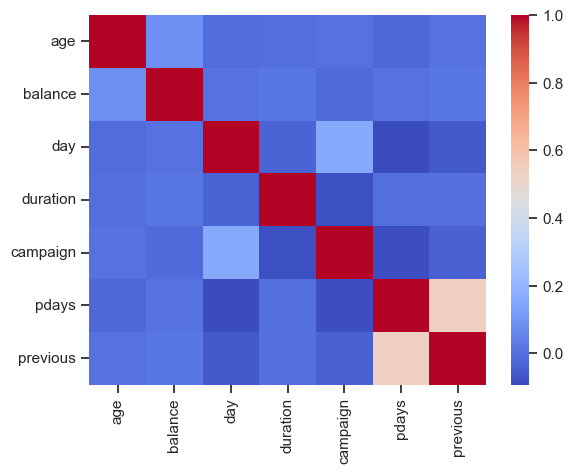

In [84]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="coolwarm")
plt.show()

In [85]:
data.drop(['default', 'pdays'], axis=1, inplace=True)

In [86]:
# create range age with 5 years each
data['age_range'] = pd.cut(data['age'], bins=10)

In [87]:
# create a dataset where 'y' is equal to yes
data_yes = data[data['y'] == 'yes']

data_yes.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,age_range
82,59,administrative,married,secondary,2343.0,yes,no,unknown,5,may,1042.0,1,0,unknown,yes,"(56.5, 64.2]"
85,56,administrative,married,secondary,45.0,no,no,unknown,5,may,1467.0,1,0,unknown,yes,"(48.8, 56.5]"
127,55,services,married,secondary,2476.0,yes,no,unknown,5,may,579.0,1,0,unknown,yes,"(48.8, 56.5]"
166,54,administrative,married,tertiary,184.0,no,no,unknown,5,may,673.0,2,0,unknown,yes,"(48.8, 56.5]"
267,42,management,single,tertiary,0.0,yes,yes,unknown,5,may,562.0,2,0,unknown,yes,"(41.1, 48.8]"


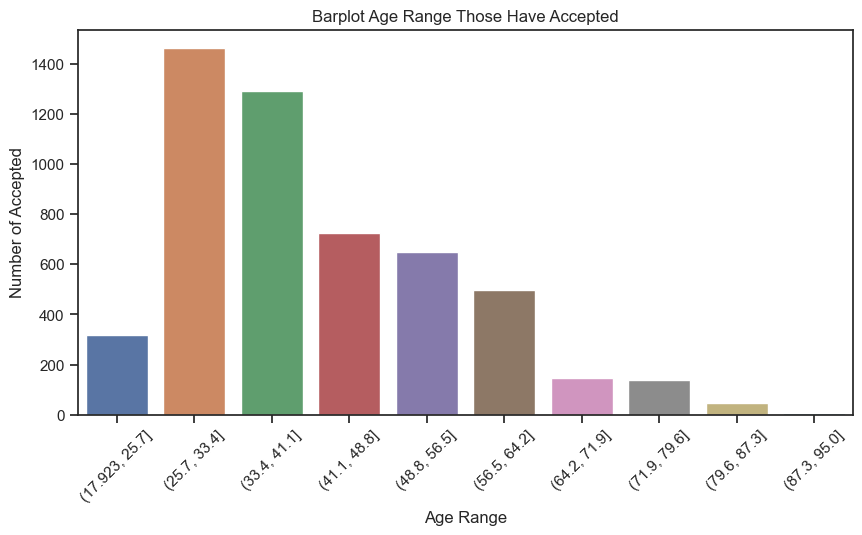

In [97]:
# barplot age_range
plt.figure(figsize=(10,5))
sns.countplot(x="age_range", data=data_yes)
plt.title("Barplot Age Range Those Have Accepted")
plt.xlabel("Age Range")
plt.ylabel("Number of Accepted")
plt.xticks(rotation=45)
plt.show()

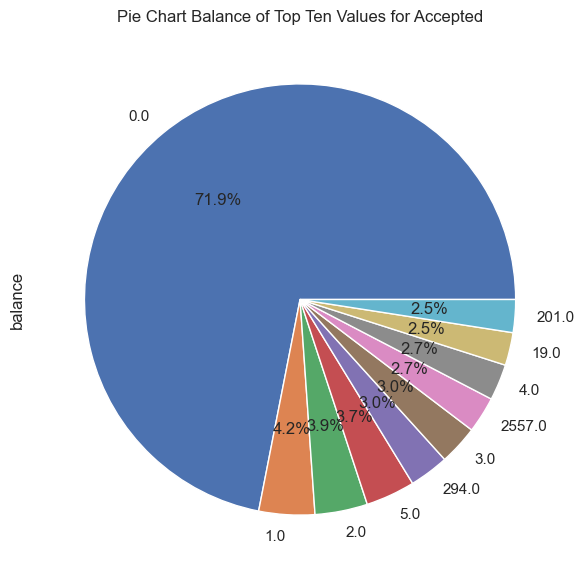

In [89]:
top_values = data_yes['balance'].value_counts().nlargest(10)

plt.figure(figsize=(15, 7))
top_values.plot.pie(autopct='%1.1f%%')
plt.title("Pie Chart Balance of Top Ten Values for Accepted")
plt.show()

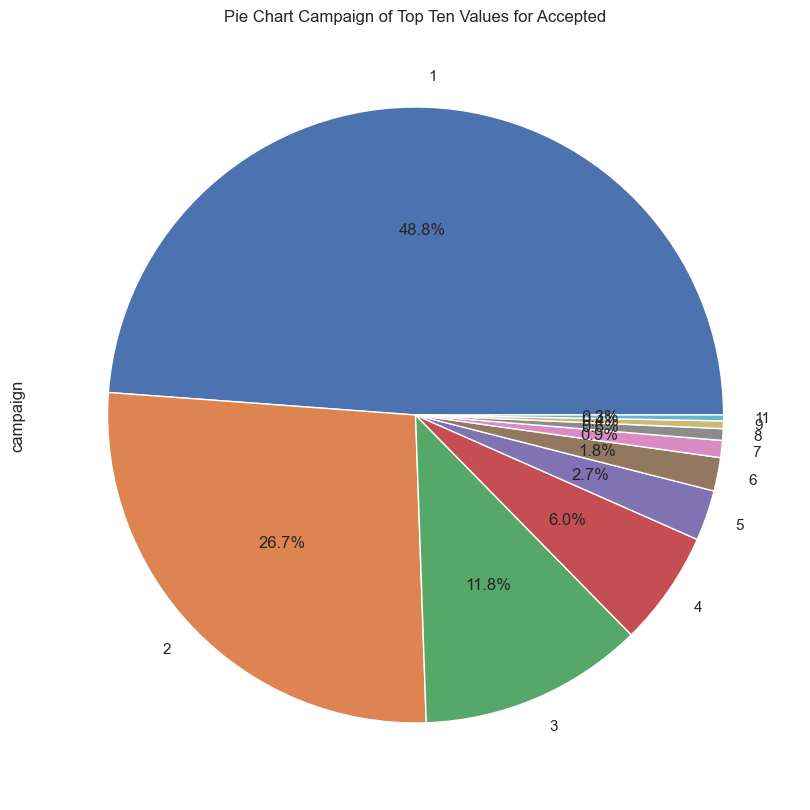

In [90]:
top_values = data_yes['campaign'].value_counts().nlargest(10)

plt.figure(figsize=(20, 10))
top_values.plot.pie(autopct='%1.1f%%')
plt.title("Pie Chart Campaign of Top Ten Values for Accepted")
plt.show()

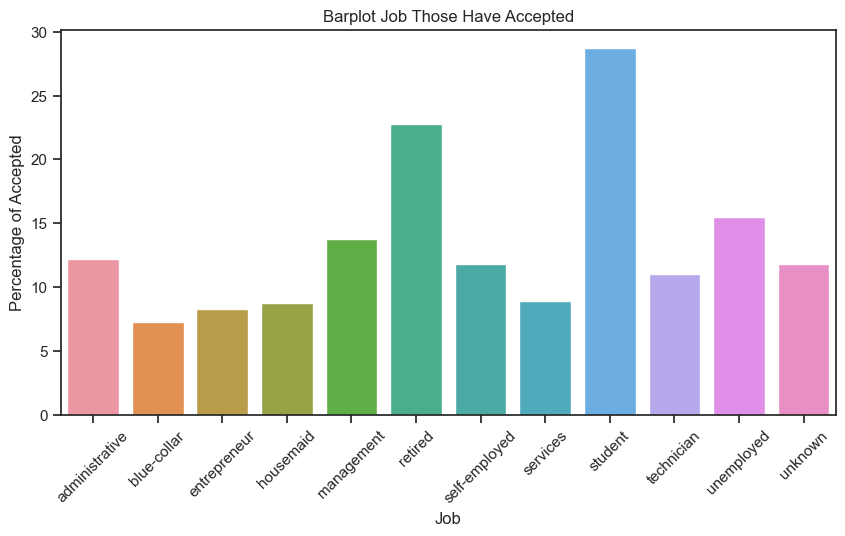

In [110]:
job_counts_total = data['job'].value_counts()
job_counts_yes = data_yes['job'].value_counts()

percentage_yes = (job_counts_yes / job_counts_total) * 100

# Barplot of job %
plt.figure(figsize=(10, 5))
sns.barplot(x=percentage_yes.index, y=percentage_yes.values)
plt.title("Barplot Job Those Have Accepted")
plt.xlabel("Job")
plt.ylabel("Percentage of Accepted")
plt.xticks(rotation=45)
plt.show()

In [91]:
# report = sv.analyze(data_yes)
# report.show_html('yes.html')

In [92]:
# feat_cfg = sv.FeatureConfig(skip='y')

# report = sv.compare([data, 'Original'], [data_yes, 'Accepted'], feat_cfg=feat_cfg)
# report.show_html('comparison_report.html')

In [93]:
data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,age_range
0,58,management,married,tertiary,2143.0,yes,no,unknown,5,may,261.0,1,0,unknown,no,"(56.5, 64.2]"
1,44,technician,single,secondary,29.0,yes,no,unknown,5,may,151.0,1,0,unknown,no,"(41.1, 48.8]"
2,33,entrepreneur,married,secondary,2.0,yes,yes,unknown,5,may,76.0,1,0,unknown,no,"(25.7, 33.4]"
3,47,blue-collar,married,unknown,1506.0,yes,no,unknown,5,may,92.0,1,0,unknown,no,"(41.1, 48.8]"
4,33,unknown,single,unknown,1.0,no,no,unknown,5,may,198.0,1,0,unknown,no,"(25.7, 33.4]"
